## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [5]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


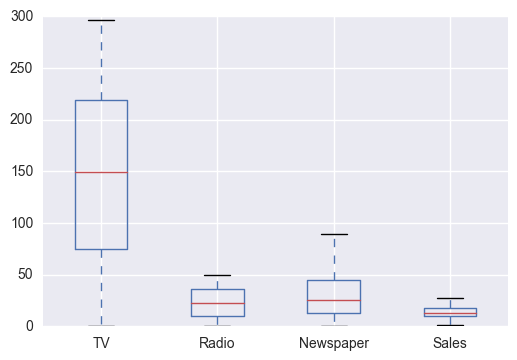

In [11]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

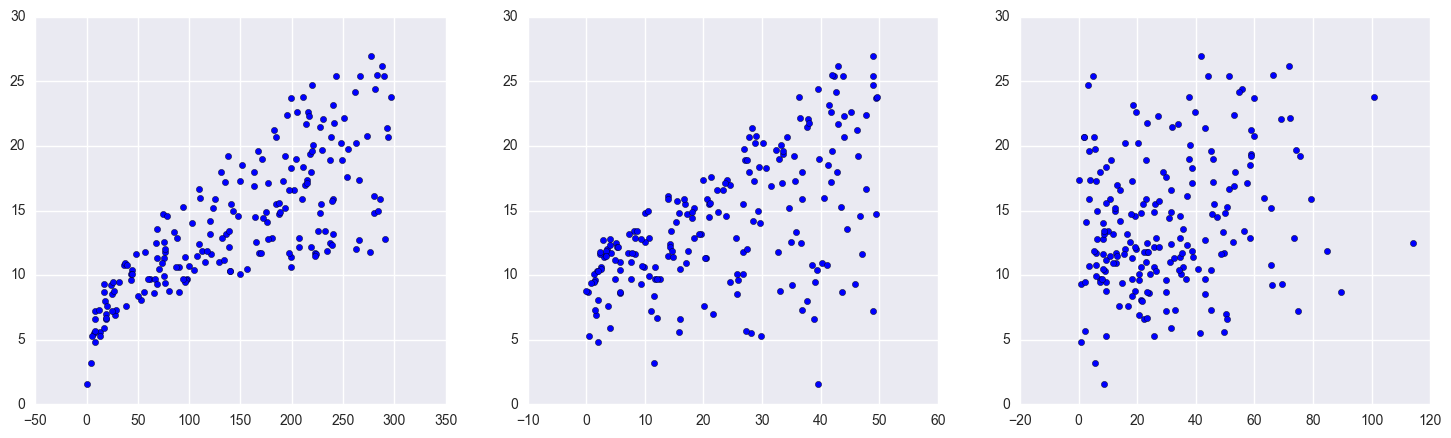

In [6]:
fig = plt.figure()
fig.set_size_inches(18,5)
axes = fig.add_subplot(1,3,1)
plt.scatter(x=df.TV, y=df.Sales)

axes = fig.add_subplot(1,3,2)
plt.scatter(x=df.Radio, y=df.Sales)

axes = fig.add_subplot(1,3,3)
plt.scatter(x=df.Newspaper, y=df.Sales)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115524650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ec41ad0>]], dtype=object)

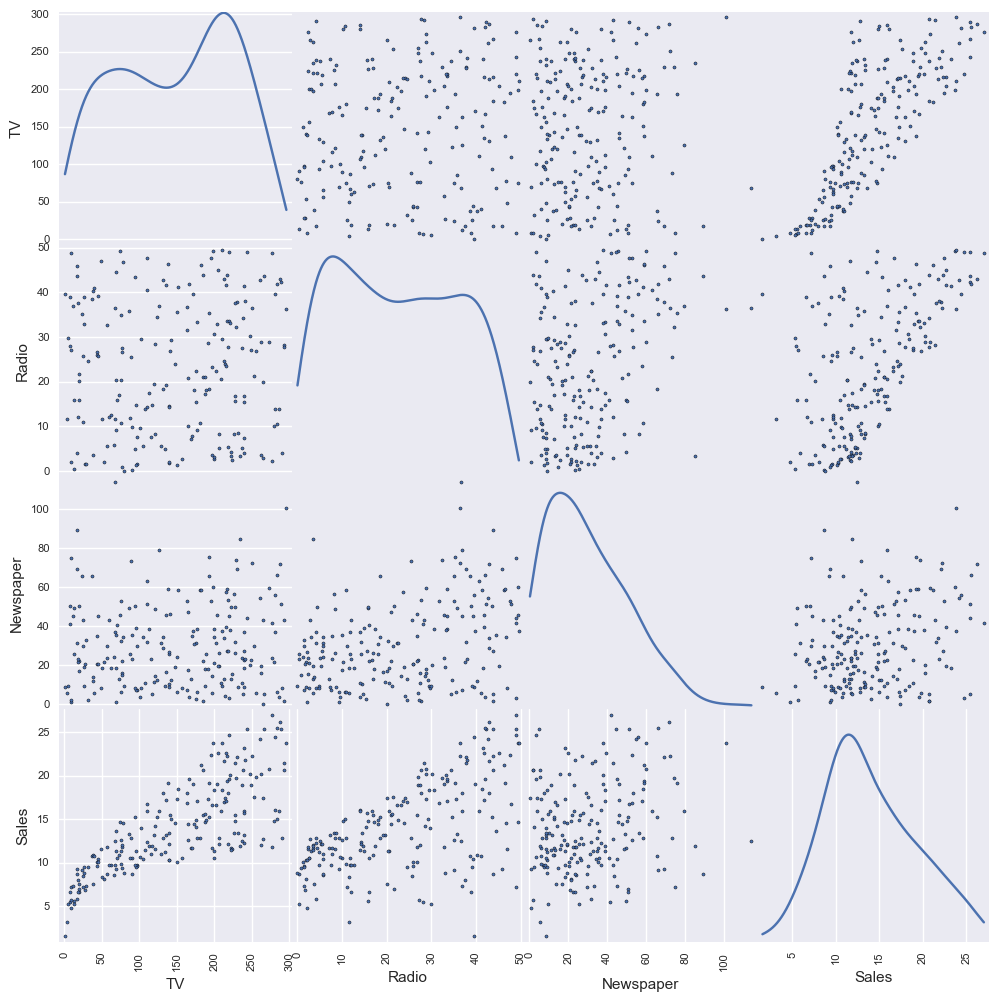

In [7]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=1.0, figsize=(12, 12), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer
From the plots we can see that the Sales and TV have a positive correlation, meaning at as TV advertisement increases, Sales also increase. Radio also has a similar correlation with Sales, although the correlation is weak compared to that of TV. Newspaper doesn't seem to have any viible correlation with Sales and in fact, it looks like increased newspaper advertisement might even reduce the sales a bit.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [24]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [8]:
y = df['Sales']

b) Set X to be just the features described above in df

In [43]:
X = df[['TV', 'Radio', 'Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [44]:
size = 200
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [45]:
regr = LinearRegression()
regr.fit(X_train, y_train)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))
Residual sum of squares: 2.79
Variance score: 0.90


e) Evalute the R^2 on training data. Is this good? Bad? Why?

Answer: Given that a variance score of 1 is a perfect score, a variance score of 0.9 indicates that the R^2 on training data is very close to perfect, meaning that there is high correlation and therefore R^2 is good.

Variance score: 0.90


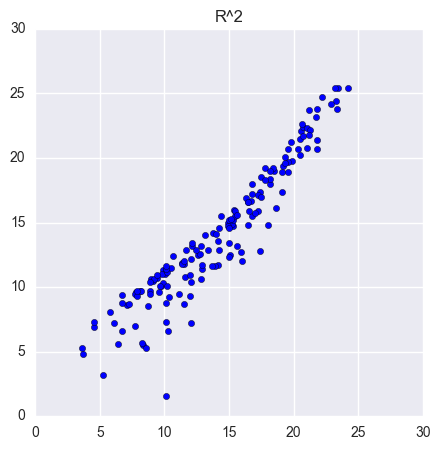

In [46]:
plt.figure(figsize=(5,5))
plt.title('R^2')
plt.scatter(regr.predict(X_train),y_train)
print('Variance score: %.2f' % regr.score(X_test, y_test))


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

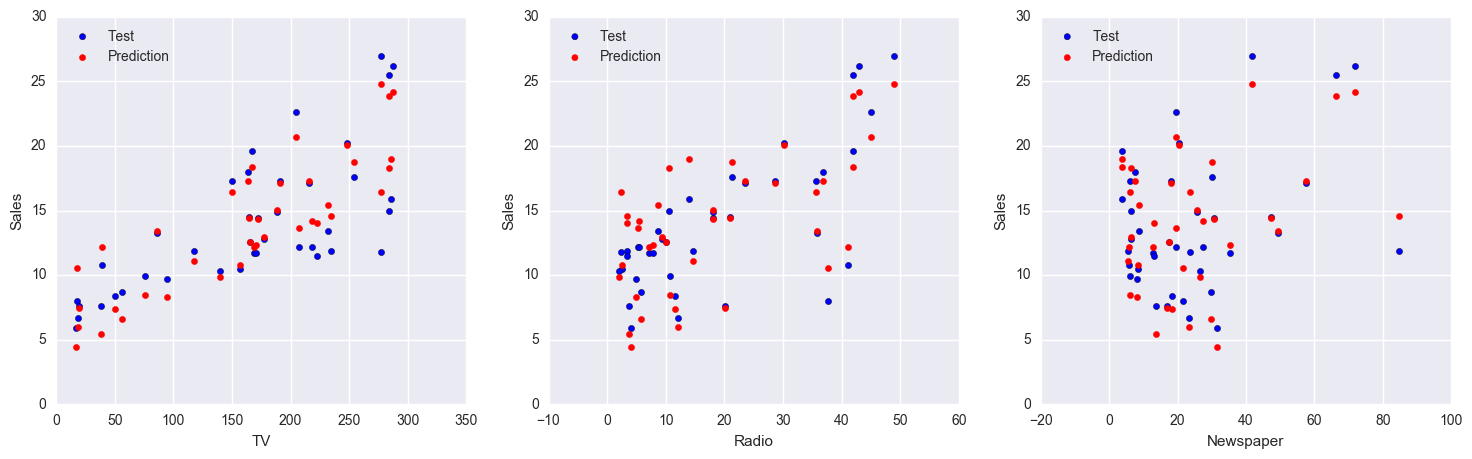

In [48]:
fig = plt.figure()
fig.set_size_inches(18,5)
a1 = fig.add_subplot(1,3,1)
a1.scatter(X_test['TV'], y_test,label='Test')
a1.scatter(X_test['TV'],regr.predict(X_test),color=['red'],label='Prediction')
a1.set_ylabel('Sales')
a1.set_xlabel('TV')
a1.legend(loc=2)

a2 = fig.add_subplot(1,3,2)
a2.scatter(X_test['Radio'], y_test,label='Test')
a2.scatter(X_test['Radio'],regr.predict(X_test),color=['red'],label='Prediction')
a2.set_ylabel('Sales')
a2.set_xlabel('Radio')
a2.legend(loc=2)

a3 = fig.add_subplot(1,3,3)
a3.scatter(X_test['Newspaper'], y_test,label='Test')
a3.scatter(X_test['Newspaper'],regr.predict(X_test),color=['red'],label='Prediction')
a3.set_ylabel('Sales')
a3.set_xlabel('Newspaper')
a3.legend(loc=2)



Answer: Looking at the proximity of the prediction and the test values, we can easily tell that the model is an accurate one.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [39]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Answer: Looking at the coefficients, we can say that the correlation coefficient of TV is 0.0472521, the correlation coefficient of Radio is 0.179922, and the correlation coefficient of Newspaper is 0.00094408.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

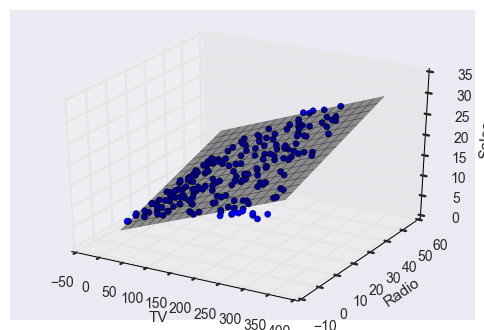

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Answer: As we increase the number of iterations, the convergence is higher. With fewer number of iterations, little to no convergence took place. However, with increased number of iterations, the computation took longer time but the convergence increased dramatically.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


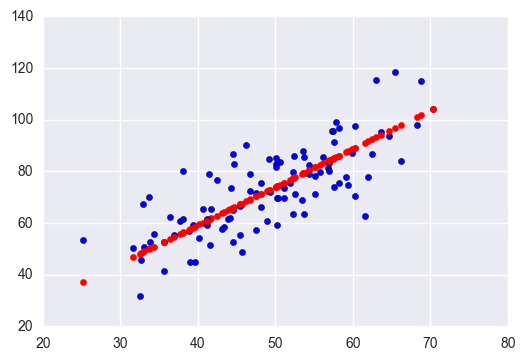

In [35]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("./data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


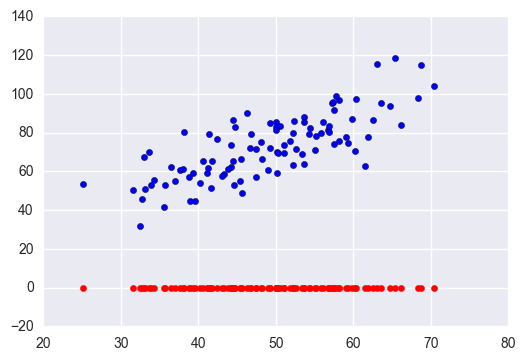

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


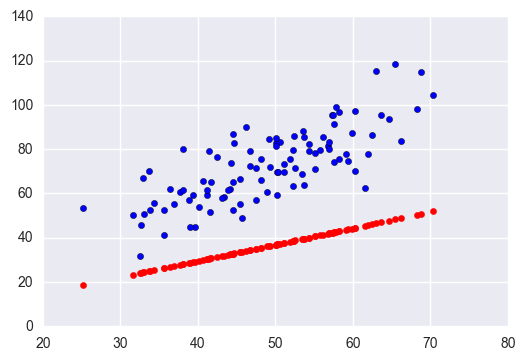

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


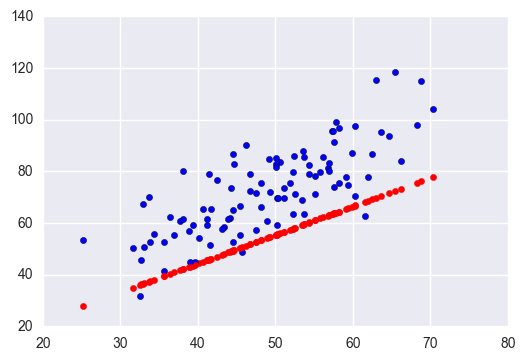

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


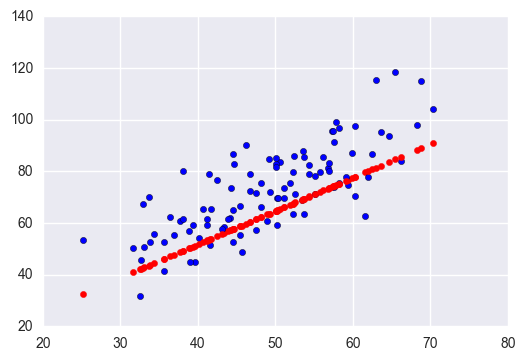

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


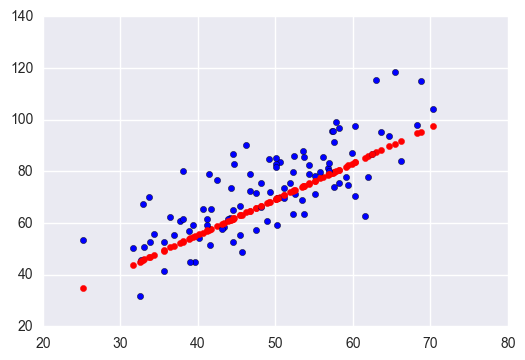

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


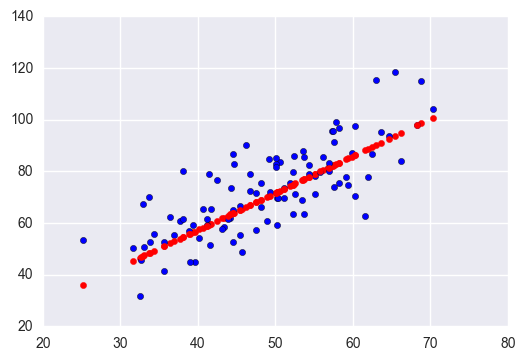

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


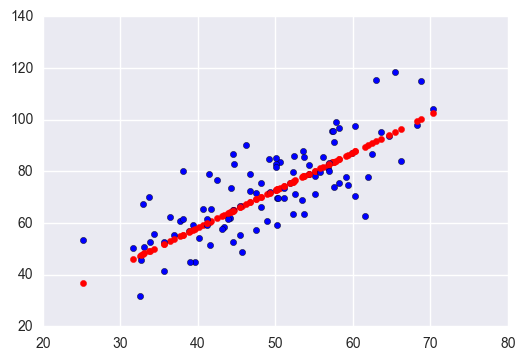

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


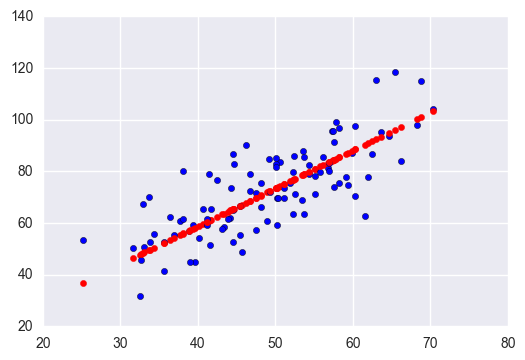

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


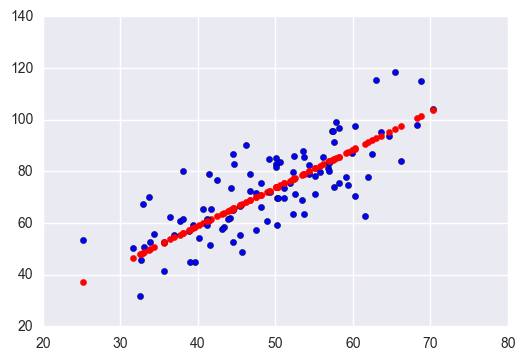

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


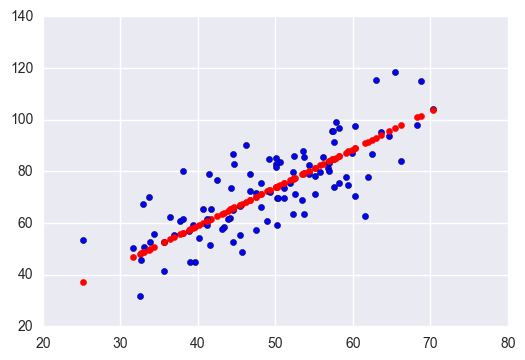

In [36]:
# Use this to visually discuss convergence rate based on learning rate
for num in range(0,10):
    run(num)
    plt.show()

# Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.